## SVM (Support Vector Machine)
SVC - support vector classifier

Support vector machines (SVMs) are a set of **supervised learning methods** used for **classification**, regression and outliers detection.

簡單來說，SVM 想要解決以下的問題：找出一個超平面(hyperplane)，使之將兩個不同的集合分開。因為資料可能是高維度的資料，超平面意指在高維中的平面。

The advantages of support vector machines are:
* Effective in **high dimensional spaces**.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also **memory efficient**.
* Versatile: different **Kernel functions** can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, the method is likely to give poor performances.
* SVMs do not directly provide probability estimates, these are calculated using an expensive **five-fold cross-validation**.

### Classification (Linear)

In [1]:
"""
http://scikit-learn.org/0.17/modules/svm.html

# from sklearn
# svm.SVC()
# svm.NuSVC()
# svm.LinearSVC()

SVC, NuSVC and LinearSVC take input two arrays:
an array X of size [n_samples, n_features] holding the training samples,
and an array y of class labels (strings or integers), size [n_samples]:

"""

'\nhttp://scikit-learn.org/0.17/modules/svm.html\n\n# from sklearn\n# svm.SVC()\n# svm.NuSVC()\n# svm.LinearSVC()\n\nSVC, NuSVC and LinearSVC take input two arrays:\nan array X of size [n_samples, n_features] holding the training samples,\nand an array y of class labels (strings or integers), size [n_samples]:\n\n'

In [2]:
# Model
from sklearn import svm
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
clf = svm.SVC(kernel='linear')
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
# Predict
clf.predict([[-0.8, -1]])

array([1])

In [4]:
# get support vectors
print(clf.support_vectors_)

# get indices of support vectors
print(clf.support_)

# get number of support vectors for each class
print(clf.n_support_)

[[-1. -1.]
 [ 1.  1.]]
[0 2]
[1 1]


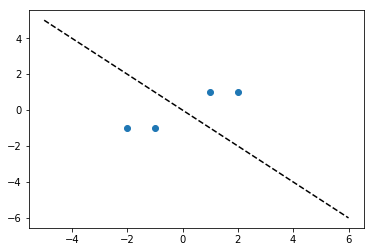

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

# data
plt.scatter(X[:, 0], X[:, 1])

# line
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 6)
yy = a * xx - clf.intercept_[0] / w[1]
line = plt.plot(xx, yy, 'k--')

### Classification (Weight)

In [6]:
# data
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

In [7]:
# linear
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1] # <--------- slope
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1] # y = a * x + b 

In [8]:
# weight
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

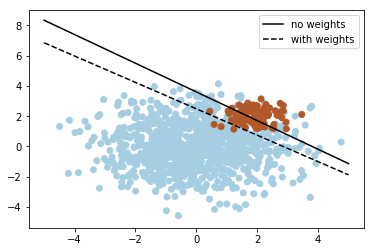

In [9]:
# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='with weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.show()

### Kernels

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

In [11]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
svc = svm.SVC(kernel='linear').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)
lin_svc = svm.LinearSVC().fit(X, y)

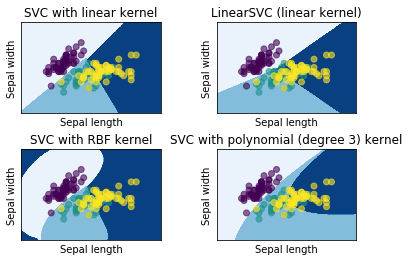

In [12]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [13]:
"""
Color Map
https://matplotlib.org/users/colormaps.html#list-colormaps
"""

'\nColor Map\nhttps://matplotlib.org/users/colormaps.html#list-colormaps\n'

### Tips 

In [14]:
help(svm)

Help on package sklearn.svm in sklearn:

NAME
    sklearn.svm - The :mod:`sklearn.svm` module includes Support Vector Machine algorithms.

PACKAGE CONTENTS
    base
    bounds
    classes
    liblinear
    libsvm
    libsvm_sparse
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.feature_selection.from_model._LearntSelectorMixin, sklearn.linear_model.base.SparseCoefMixin)
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.svm.classes.LinearSVR(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
        sklearn.svm.classes.NuSVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
        sklearn.svm.classes.SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
    sklearn.feature_selection.from_model._LearntSelectorMixin(sklearn.base.TransformerMixin)
        sklearn.svm.classes.LinearS

* **Avoiding data copy**: Use numpy array to avoid data copy.
* **Kernel cache size**: The size of the kernel cache has a strong impact on run times for larger problems. Default 200 MB. You can set it to such as 500(MB) or 1000(MB).
* **Setting C**: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.
* **Standardization**: Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1.


* **class_weight**
* **intercept_scaling**: default=1
* **penalty**: slack variable # <--- Explain it!
* **degree**: default 3

### Discussions

* Please google "SVM" at google image. (http://www.cmlab.csie.ntu.edu.tw/~cyy/learning/tutorials/SVM2.pdf)
* We only care about data points near the "hyperplane". Why?
* Maximize 2D => Maximize 2/|w| => Minimize (1/2)|w|^2
* At least, two data points (in n-dimension, two vectors) will be 'at' the support vector hyperplanes.
* These points (vectors) are called 'support vectors'.

### How to do high dimension SVM? (i.e., non-linear)

* 把資料投射到更高維度的空間或是特徵空間 (feature space)，不同的 kernel 即為使用不同的映射函數($\phi$)。
* You can search "svm kernel" in google image.